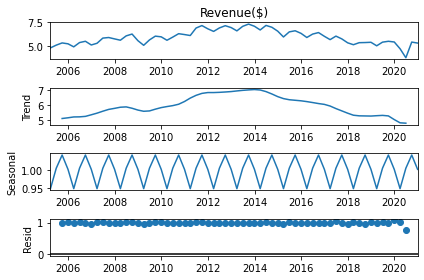

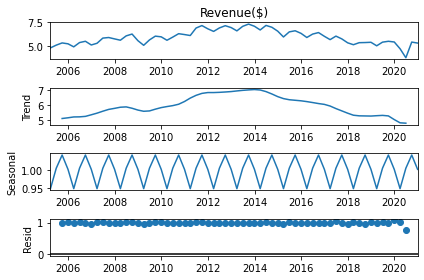

In [58]:
# Referral link
# https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
data = pd.read_csv('input/McDonald_Test.csv', index_col ='Date', parse_dates = True)

# Print the first five rows of the dataset
data.head()

# ETS Decomposition
result = seasonal_decompose(data['Revenue($)'], model ='multiplicative')
# ETS plot
result.plot()


In [22]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['Revenue($)'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=54.881, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=54.689, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=55.655, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=53.671, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=54.755, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=55.482, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=55.568, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=54.321, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=54.325, Time=0.05 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=53.438, Time=0.09 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=54.077, Time=0.05 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=55.050, Time=0.17 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=55.163, Time=0.20 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=54.146,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 -18.260
Date:                              Fri, 09 Apr 2021   AIC                             48.521
Time:                                      21:09:58   BIC                             60.112
Sample:                                           0   HQIC                            52.950
                                               - 64                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0406      0.024     -1.718      0.086      -0.087       0.006
ma.L1         -0.3768      0.124     -3.038      0.002      -0.620      -0.134
ma.L2         -0.4574      0.198     -2.315      0.021      -0.845      -0.070
ma.L3          0.4057      0.301      1.347      0.178      -0.184       0.996
ma.S.L12      -0.6681      0.519     -1.286      0.198      -1.686       0.350
sigma2         0.1024      0.029      3.534      0.000       0.046       0.159
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                61.39
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                            -0.65
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:

# Split data into train / test sets
train = data.iloc[:len(airline)-12]
test = data.iloc[len(airline)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 3)x(0, 1, [1], 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(data['Revenue($)'], 
                order = (0, 1, 3), 
                seasonal_order =(0, 1, [1], 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Revenue($)   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 -20.239
Date:                              Fri, 09 Apr 2021   AIC                             50.479
Time:                                      21:12:07   BIC                             60.138
Sample:                                  03-31-2005   HQIC                            54.170
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2956      0.128     -2.306      0.021      -0.547      -0.044
ma.L2         -0.3993      0.188     -2.120      0.034      -0.769      -0.030
ma.L3          0.4027      0.303      1.327      0.184      -0.192       0.997
ma.S.L12      -0.4366      0.273     -1.602      0.109      -0.971       0.097
sigma2         0.1211      0.018      6.670      0.000       0.085       0.157
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                63.73
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.59   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

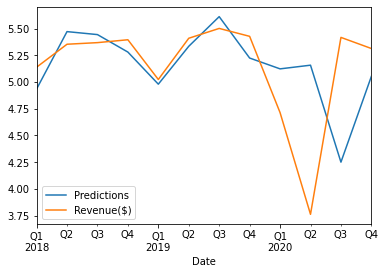

In [25]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Revenue($)'].plot(legend = True)

In [41]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse = rmse(test['Revenue($)'], predictions)
  
# Calculate mean squared error
mse = mean_squared_error(test['Revenue($)'], predictions)

print("rmse: ", rmse)
print("mse: ", mse)

rmse:  0.5540387902049846
mse:  0.30695898105180297


<AxesSubplot:xlabel='Date'>

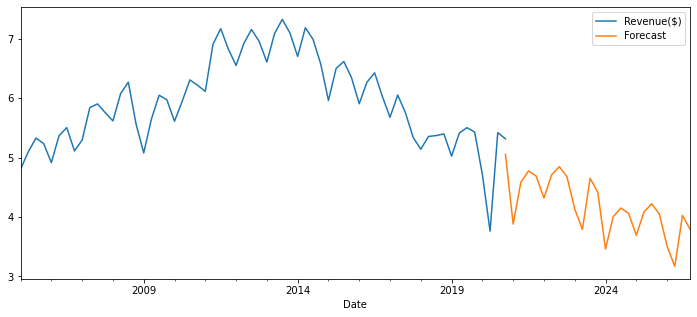

In [48]:
# Train the model on the full dataset
model = SARIMAX(data['Revenue($)'], 
                        order = (0, 1, 3), 
                        seasonal_order =(0, 1, [1], 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data)-1, 
                          end = (len(data)-1) + 2*12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data['Revenue($)'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)